In [1]:
import cv2 as cv
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
import os
%matplotlib inline
from shutil import copyfile

In [2]:
# Parameters
n_images = 10 #80
max_shift_x = 10 #7
max_shift_y = 0

In [3]:
# Paths
from_f = "D:\\work repository\\linescanprinting\\build\\SaveImages\\LIVE\\VIEW_1\\Image000.bmp"
base_path = "D:\\work repository\\linescanprinting\\build\\SaveImages\\LIVE\\VIEW_1"

# VIEW 1

In [6]:
def _imshow(image):
    plt.figure(figsize=(12,8))
    plt.imshow(image, interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([]) 
    plt.show()

D:\work repository\linescanprinting\build\SaveImages\LIVE\VIEW_1\Image000.bmp
(2250, 6144, 3)


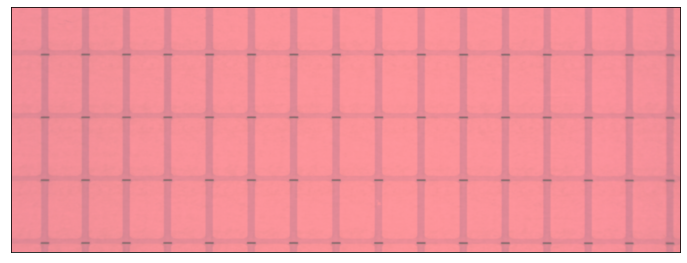

In [7]:
seed = base_path + "\\Image000.bmp"
print(seed)
ref2 = cv.imread(seed, cv.IMREAD_UNCHANGED)
print(ref2.shape)
_imshow(ref2)

# IMAGE GENERATION

In [4]:
# "{:04d}".format(i)
for i in range(1, n_images):
    to_f = from_f.replace("Image000.bmp", "Image{:03d}.bmp".format(i))
    copyfile(from_f, to_f)

# SHAKE IMAGES

In [5]:
def shift_x(img, width, height, shift, negative=False):
    T = np.float32([[1, 0, rand_x], [0, 1, 0]]) 
    if negative:
        T = np.float32([[1, 0, -rand_x], [0, 1, 0]]) 
    return cv.warpAffine(img, T, (width, height))
    
def shift_y(img, width, height, shift, negative=False):
    T = np.float32([[1, 0, 0], [0, 1, rand_y]])
    if negative:
        T = np.float32([[1, 0, 0], [0, 1, -rand_y]])
    return cv.warpAffine(var, T, (width, height))

def shift_xy(img, width, height, shift, negative=False):
    T = np.float32([[1, 0, rand_x], [0, 1, rand_y]])
    if negative:
        T = np.float32([[1, 0, -rand_x], [0, 1, -rand_y]])
    return cv.warpAffine(var, T, (width, height))

In [6]:
for i in range(1, n_images):
    path = os.path.join(base_path, "Image{:03d}.bmp".format(i))
    var = cv.imread(path, cv.IMREAD_UNCHANGED)
    print(path)
    height, width = var.shape[:2] 

    rand_x = np.random.randint(0, max_shift_x)
    if max_shift_y != 0:
        rand_y = np.random.randint(0, max_shift_y)
    else:
        rand_y = 0
    
    choice = np.random.choice(['x', 'y', 'xy'], 1, True, [0.7, 0.2, 0.1])[0]
    negative = np.random.choice([True, False], 1, True, [0.5 , 0.5])[0]
    if choice == 'x':
        var = shift_x(var, width, height, rand_x, negative)
    if choice == 'y':
        var = shift_y(var, width, height, rand_y, negative)
    if choice == 'xy':
        var = shift_xy(var, width, height, rand_x, negative)

    var = cv.imwrite(path, var)

D:\work repository\linescanprinting\build\SaveImages\LIVE\VIEW_1\Image001.bmp
D:\work repository\linescanprinting\build\SaveImages\LIVE\VIEW_1\Image002.bmp
D:\work repository\linescanprinting\build\SaveImages\LIVE\VIEW_1\Image003.bmp
D:\work repository\linescanprinting\build\SaveImages\LIVE\VIEW_1\Image004.bmp
D:\work repository\linescanprinting\build\SaveImages\LIVE\VIEW_1\Image005.bmp
D:\work repository\linescanprinting\build\SaveImages\LIVE\VIEW_1\Image006.bmp
D:\work repository\linescanprinting\build\SaveImages\LIVE\VIEW_1\Image007.bmp
D:\work repository\linescanprinting\build\SaveImages\LIVE\VIEW_1\Image008.bmp
D:\work repository\linescanprinting\build\SaveImages\LIVE\VIEW_1\Image009.bmp
